In [75]:
import numpy as np 
import pandas as pd

In [76]:
data = pd.read_csv('T1.csv')

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [78]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [79]:
data.shape

(50530, 5)

In [80]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

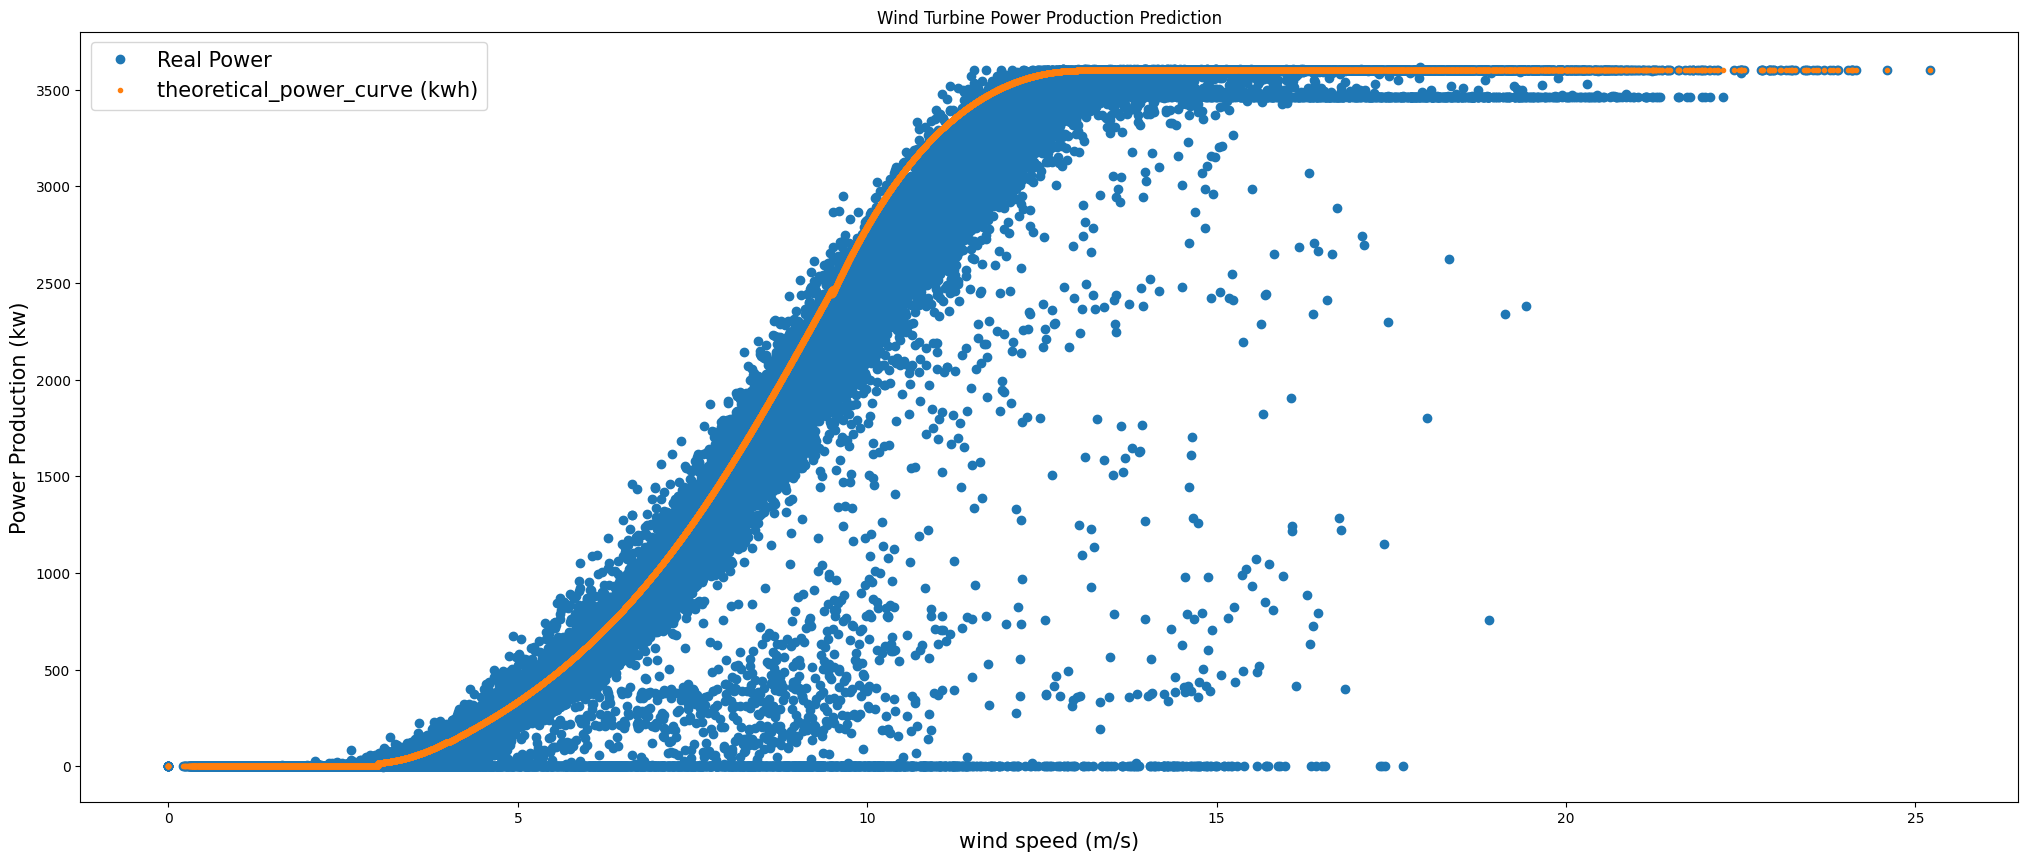

In [81]:
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

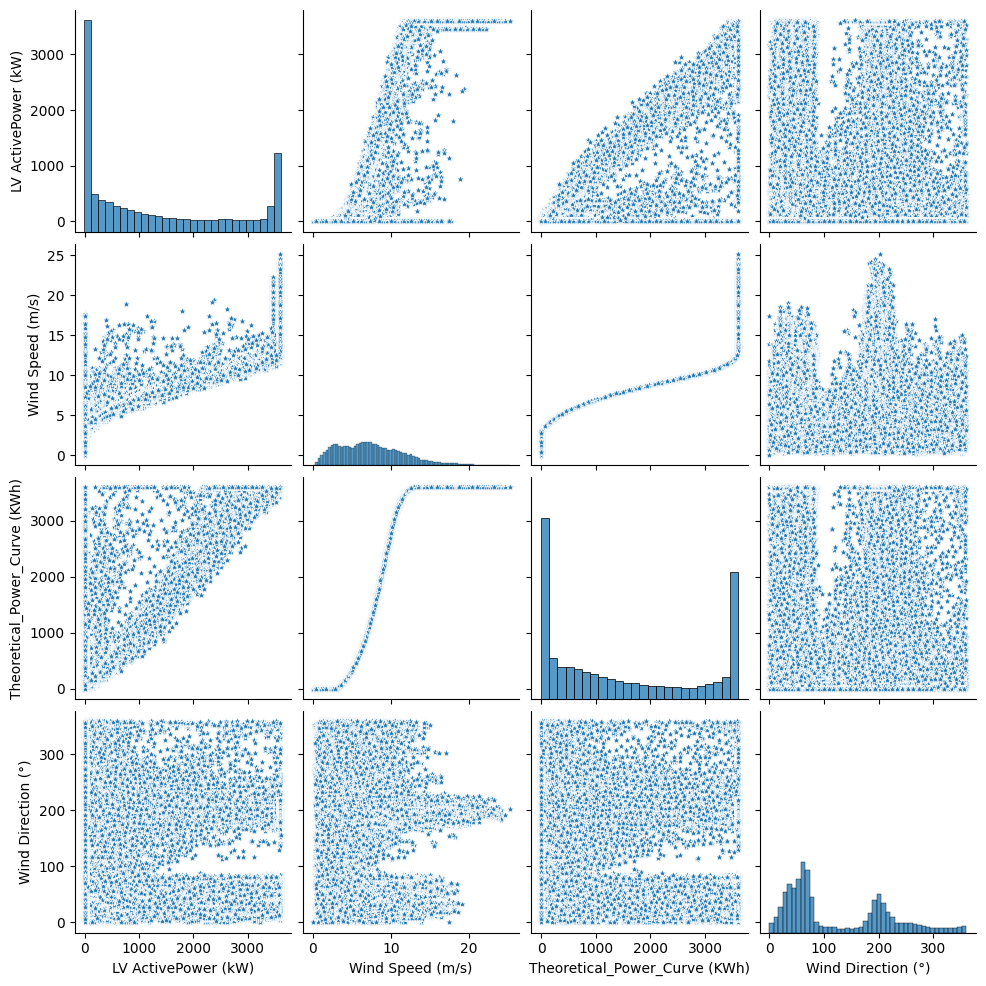

In [82]:
import seaborn as sns
sns.pairplot(data, markers='*')

In [83]:

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [84]:
def outlier_remover(dat, prop, min, max):
    d = dat
    q_low = d[prop].quantile(min)
    q_hi  = d[prop].quantile(max)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

In [85]:
d = {}
step = 50
i = 1
for x in range(20, 3400, step):
    d[i] = data[((data['LV ActivePower (kW)']>=x)&((data['LV ActivePower (kW)']<x+step)))]
    #print(d[i])
    i = i + 1
print("There are in total of {} DataFrames".format(i-1))

There are in total of 68 DataFrames


In [86]:
d[69] = data[(data['LV ActivePower (kW)']>=3300)]

In [87]:
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.9
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    d[x] = outlier_remover(d[x], 'Wind Speed (m/s)', 0.0001, F)

In [88]:
df=pd.DataFrame()
for infile in range(1,70):
    data = d[infile]
    df=df.append(data,ignore_index=True)

In [89]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 12:30,41.947239,3.253968,29.286956,233.065903
1,03 01 2018 17:10,65.987907,3.801294,93.007188,221.525894
2,03 01 2018 17:30,50.422050,3.677906,74.457521,220.469299
3,05 01 2018 06:50,66.641510,3.820689,96.144477,39.266220
4,05 01 2018 08:00,55.445351,3.734816,82.710487,69.539963


In [90]:
df.shape

(37803, 5)

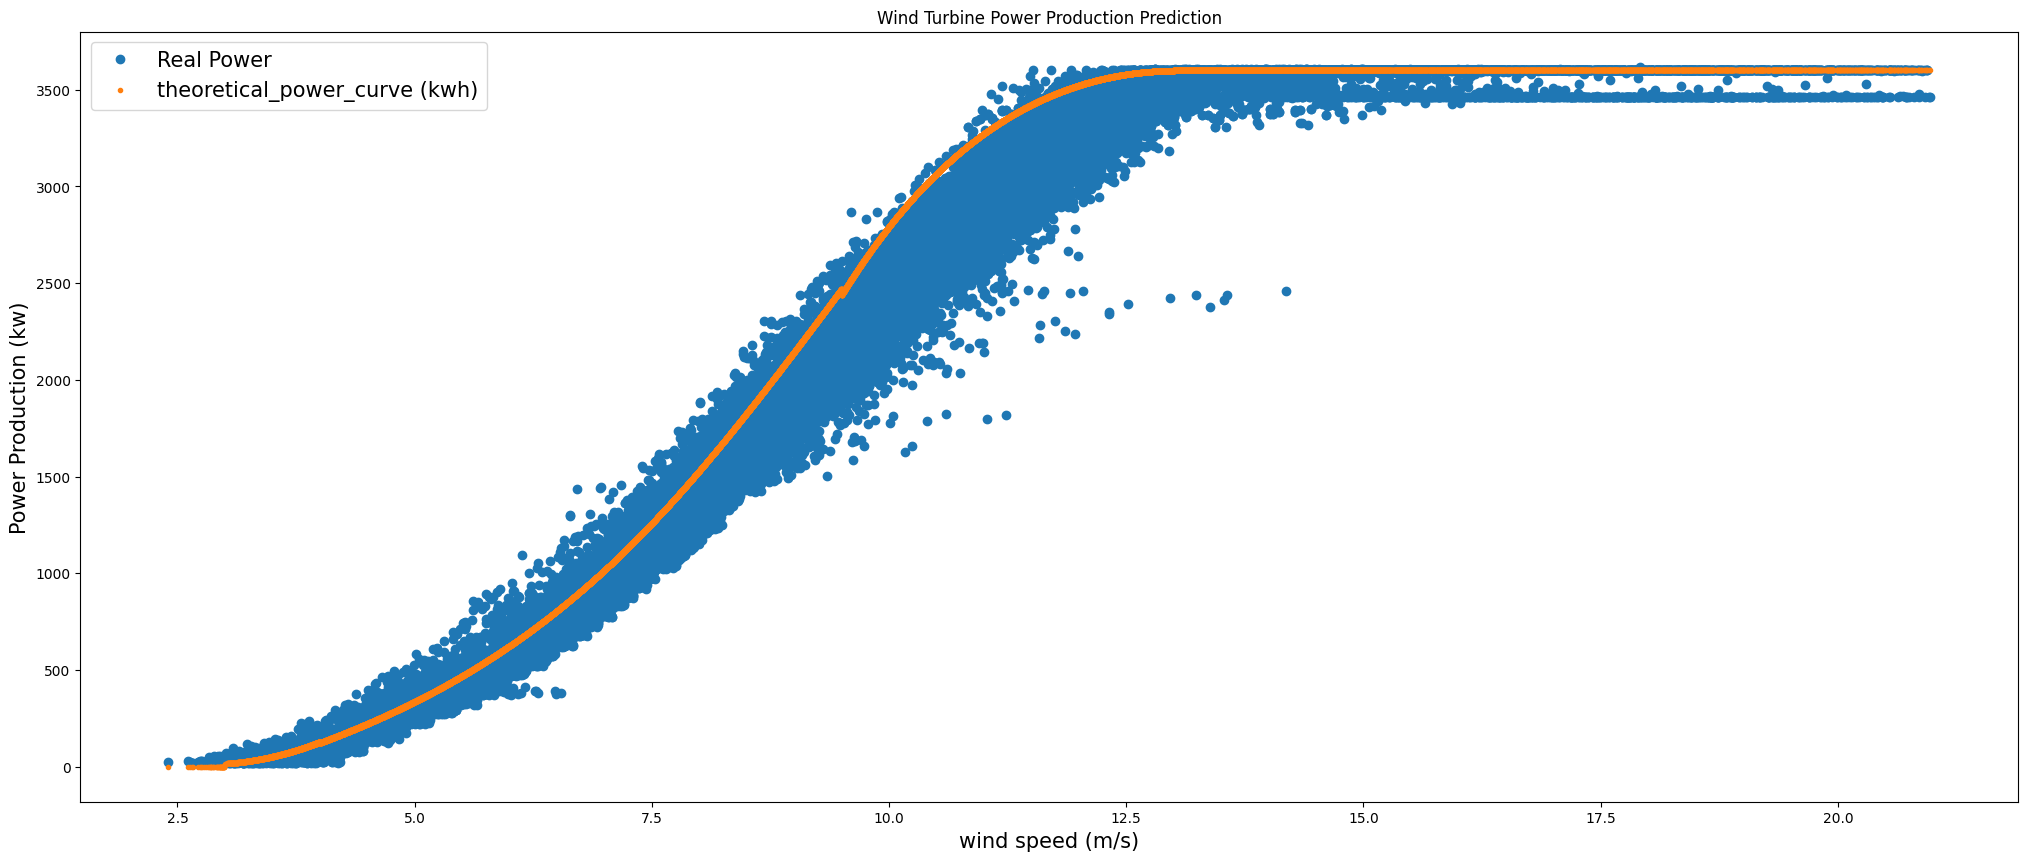

In [91]:
data = df
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

In [98]:
ftrain = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']

def Definedata():
    data2 = df[ftrain]
    X = data2.drop(columns=['LV ActivePower (kW)']).values
    y = data2['LV ActivePower (kW)'].values
    return X, y

In [93]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

In [94]:
def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    TP = df['Theoretical_Power_Curve (KWh)']
    number = len(df['Wind Speed (m/s)'])
    aa=[x for x in df['Wind Speed (m/s)']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='theoretical_power_curve (kwh)')
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  86.2019481851275
Mean Squared  Error      :  16287.624255027184
Root Mean Squared  Error :  127.62297698701117
Accuracy on Traing set   :  0.9937399430256927
Accuracy on Testing set  :  0.9896820050171048


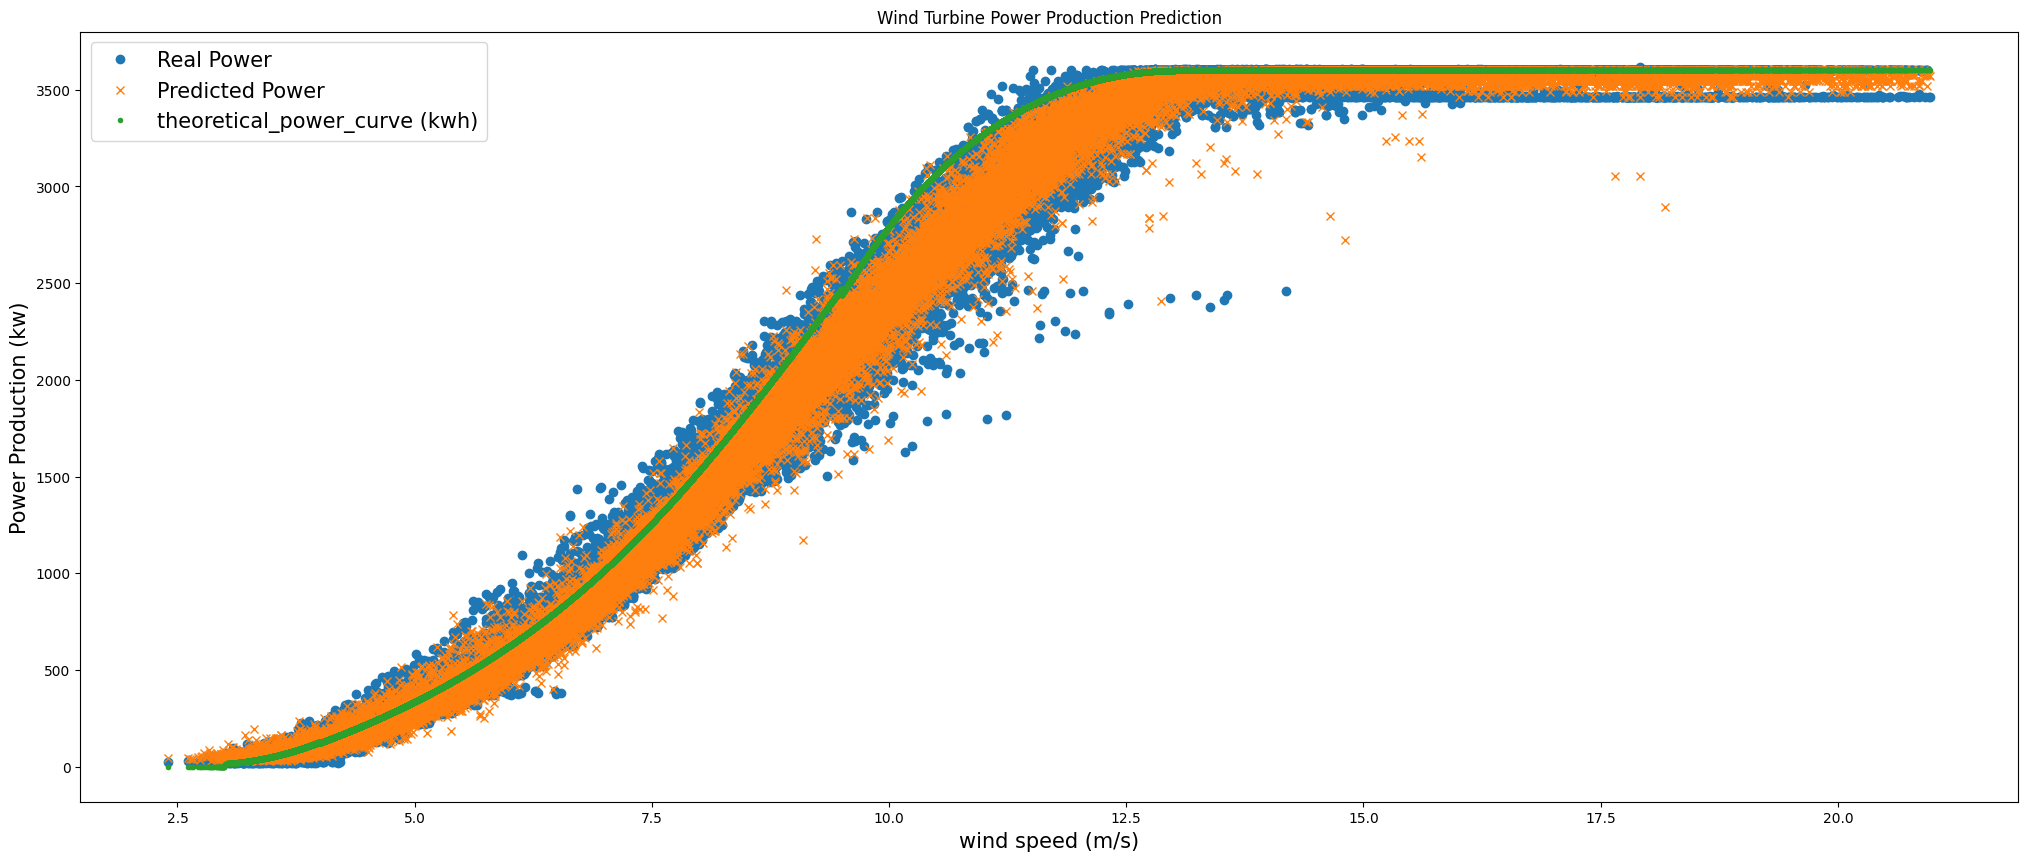

In [95]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  98.07427468966858
Mean Squared  Error      :  22753.893305869857
Root Mean Squared  Error :  150.8439369211433
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9855857089225991


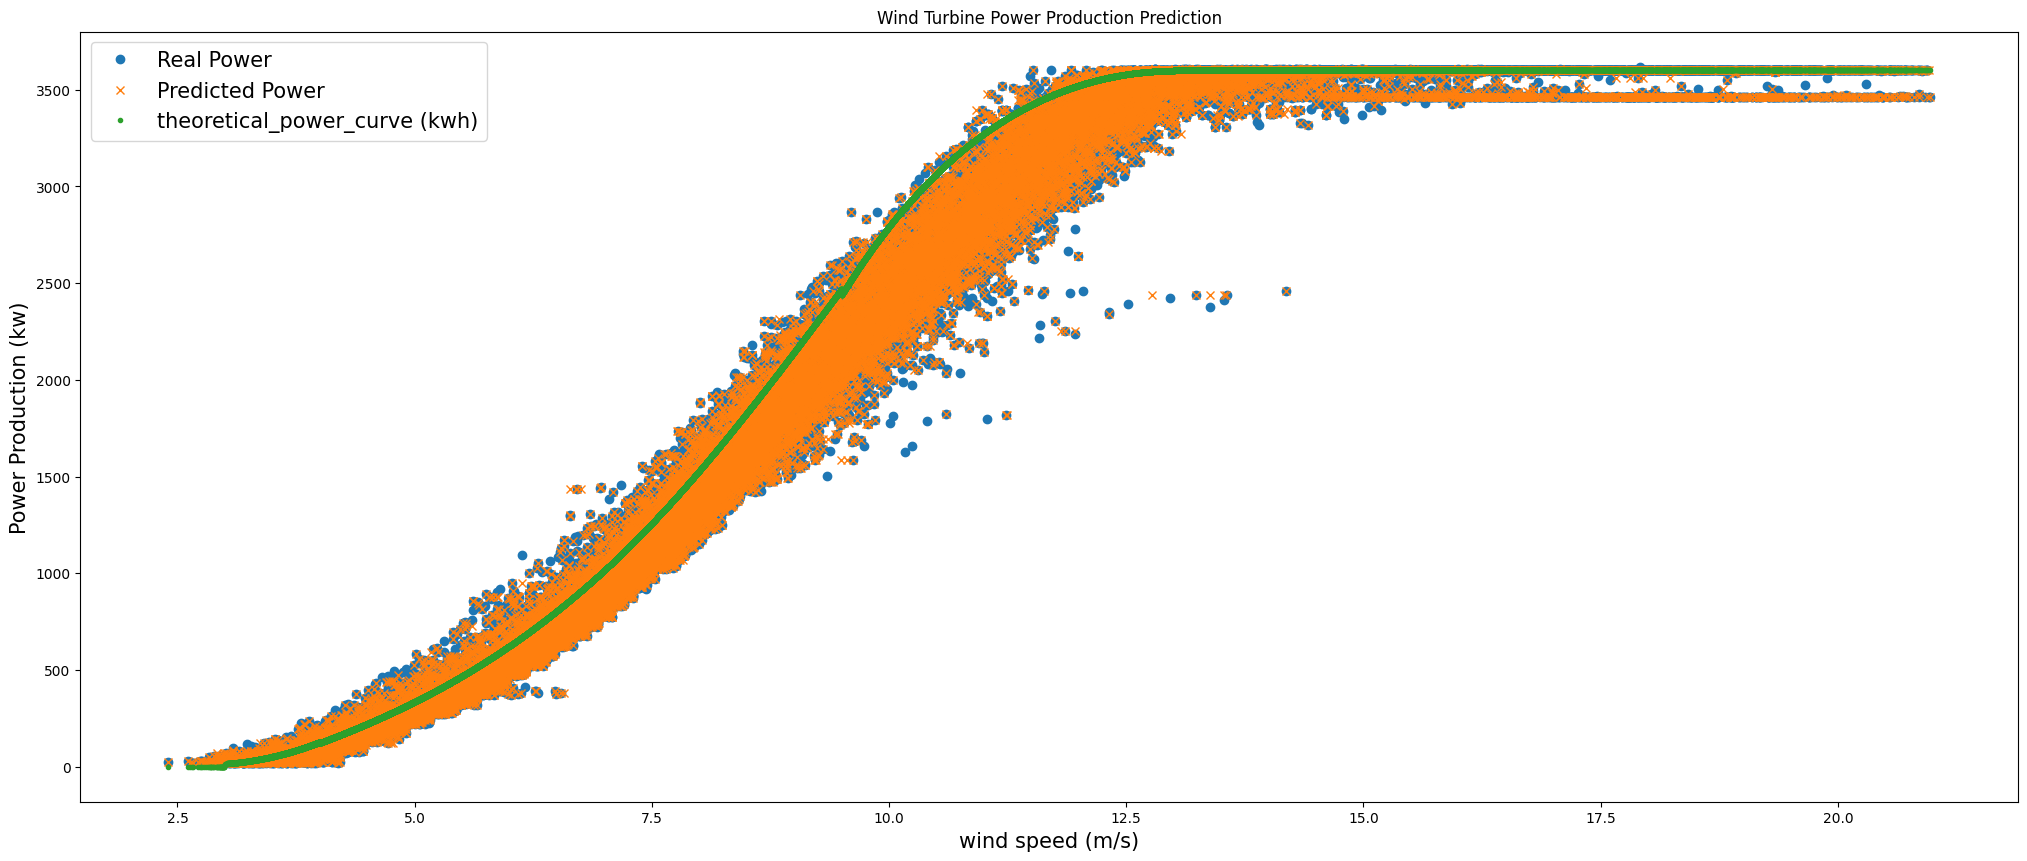

In [96]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  76.96505159129906
Mean Squared  Error      :  13504.10274443558
Root Mean Squared  Error :  116.20715444599605
Accuracy on Traing set   :  0.9989222044035401
Accuracy on Testing set  :  0.9914453291539691


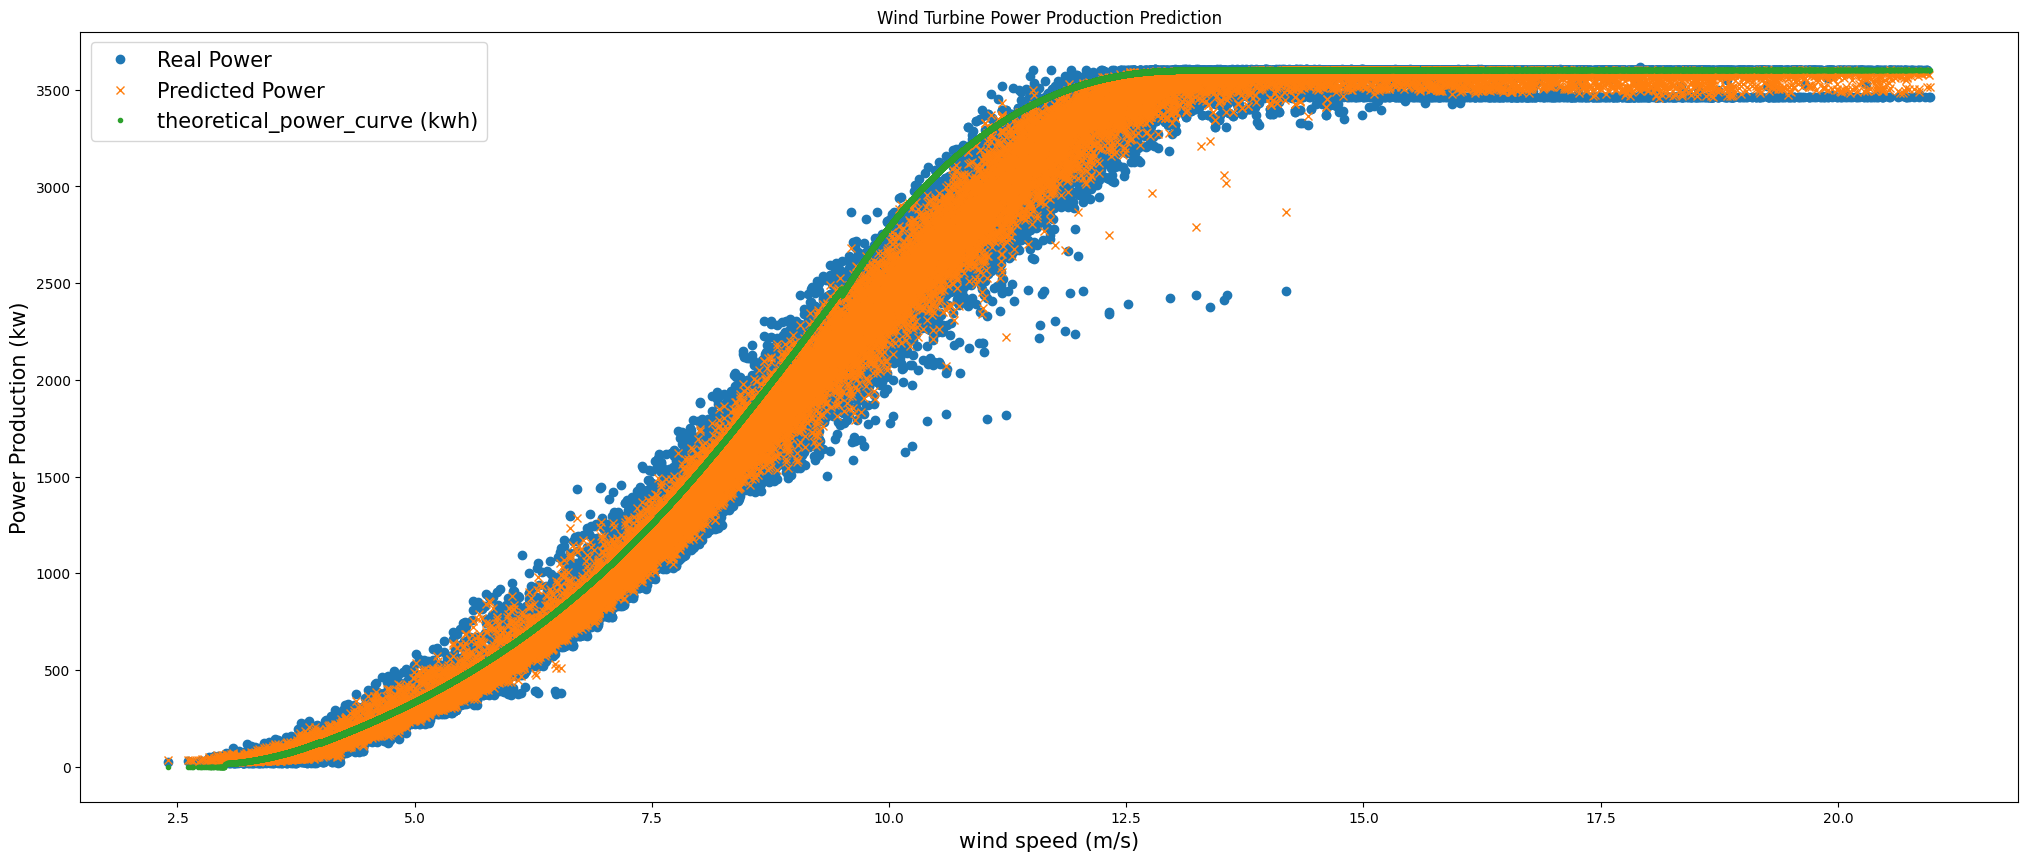

In [97]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  76.73995111763604
Mean Squared  Error      :  13168.264871568525
Root Mean Squared  Error :  114.75306040175366
Accuracy on Traing set   :  0.995230570335858
Accuracy on Testing set  :  0.9916580780136586


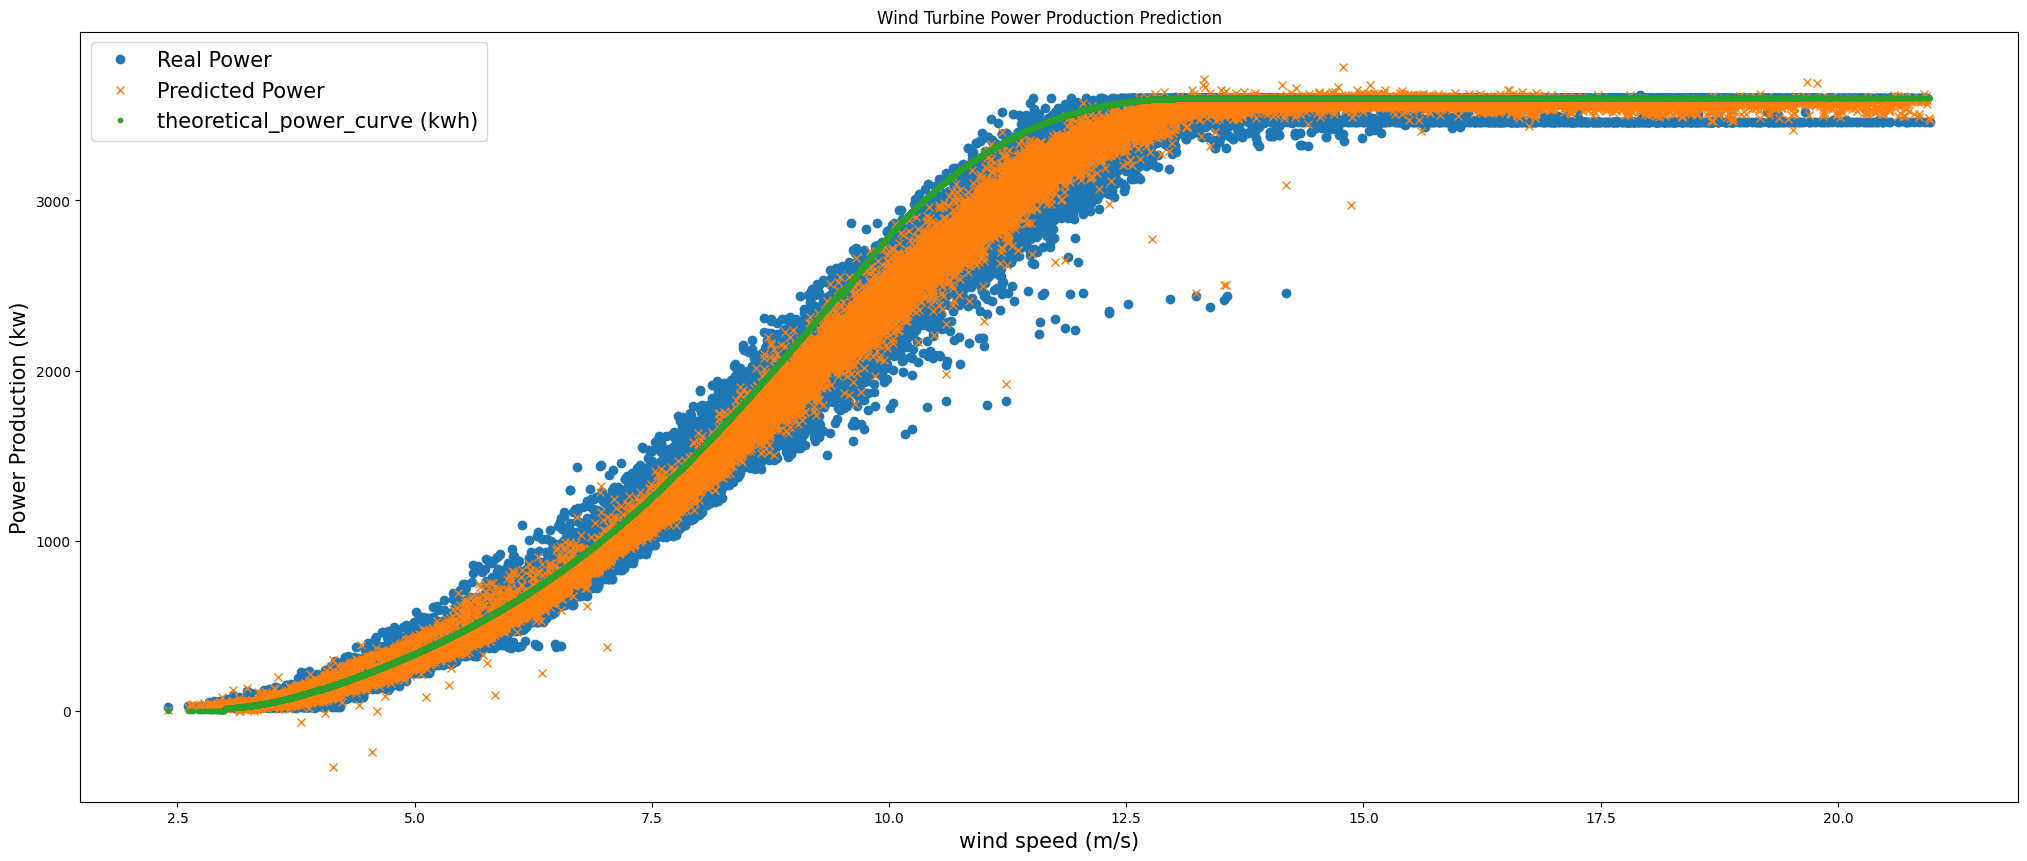

In [74]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)